In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from flep_analysis_tools import *

In [2]:
flep_df = pd.read_csv("../../data/flep/prix_2022.csv")
flep_df["date"] = pd.to_datetime(flep_df["date"])
print(flep_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13756 entries, 0 to 13755
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Menu                 13756 non-null  object        
 1   Resto                13756 non-null  object        
 2   Nutri score          12411 non-null  object        
 3   Eco score            12412 non-null  object        
 4   Vegetarien spcécifé  5439 non-null   float64       
 5   Origine              4726 non-null   object        
 6   Prix etudiant        7609 non-null   float64       
 7   Prix doctorant       7439 non-null   float64       
 8   Prix visiteur        7437 non-null   float64       
 9   Prix campus          7443 non-null   float64       
 10  Prix /100g           1033 non-null   float64       
 11  Prix etudiant /100g  174 non-null    float64       
 12  Prix unique          4786 non-null   object        
 13  Prix demi portion    205 non-nu

In [3]:
flep_df.head(10)

,Menu,Resto,Nutri score,Eco score,Vegetarien spcécifé,Origine,Prix etudiant,Prix doctorant,Prix visiteur,Prix campus,Prix /100g,Prix etudiant /100g,Prix unique,Prix demi portion,Prix (non traité),date
0,Arrancini tomato mozarella\nsauce\n Vegetables...,Alpine,b+,c,NaN,NaN,8.0,9.0,11.0,10.0,NaN,NaN,NaN,NaN,E 8.00 CHFD 9.00 CHFC 10.00 CHFV 11.00 CHF,2022-01-03
1,Chef Noï's Pad Thaï\nSautéed vegetables\ncébette,Alpine,a,c,NaN,NaN,10.5,11.0,12.5,11.5,NaN,NaN,NaN,NaN,D 11.00 CHFE 10.50 CHFC 11.50 CHFV 12.50 CHF,2022-01-03
2,Swiss Veal Sausage with onion sauce\nCornettes...,Alpine,d+,e,NaN,NaN,11.5,12.0,13.5,12.5,NaN,NaN,NaN,NaN,E 11.50 CHFD 12.00 CHFC 12.50 CHFV 13.50 CHF,2022-01-03
3,"Cappelletti with raw ham, lemon cream and seas...",Arcadie,a,c,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN,NaN,2.30 CHF/100g,2022-01-03
4,"Gratin of rigatoni, gorgonzola cream, mushroom...",Arcadie,a,c,NaN,NaN,5.5,6.5,8.0,7.0,NaN,NaN,NaN,NaN,E 5.50 CHFD 6.50 CHFC 7.00 CHFV 8.00 CHF,2022-01-03
5,Mozzarella balls with sun-dried tomatoes and c...,Arcadie,b+,c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00,NaN,12.00 CHF,2022-01-03
6,"Polenta cake with Gruyère cheese, bacon and se...",Le Klee by Novae,b,c,NaN,NaN,5.5,6.5,8.0,7.0,NaN,NaN,NaN,NaN,E 5.50 CHFD 6.50 CHFC 7.00 CHFV 8.00 CHF,2022-01-03
7,"Pork cheeks confit with mustard, quinoa and beets",Microcity,a-,c,NaN,NaN,10.0,11.0,13.0,12.0,NaN,NaN,NaN,NaN,E 10.00 CHFD 11.00 CHFC 12.00 CHFV 13.00 CHF,2022-01-03
8,"Cantonese rice, Quorn, soy and candied ginger",Microcity,a,b,NaN,NaN,10.0,11.0,13.0,12.0,NaN,NaN,NaN,NaN,E 10.00 CHFD 11.00 CHFC 12.00 CHFV 13.00 CHF,2022-01-03
9,"Penne with garlic and peppers, pesto, spinach ...",Microcity,a-,b,NaN,NaN,7.5,8.0,9.0,8.5,NaN,NaN,NaN,NaN,E 7.50 CHFD 8.00 CHFC 8.50 CHFV 9.00 CHF,2022-01-03


In [4]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


def plot_mean_student_price(resto_df: pd.DataFrame, moving_average_window=5):
    temp = moving_average(resto_df["Prix etudiant"], moving_average_window)
    plt.plot(resto_df["date"][:len(temp)], temp)


def plot_mean_all_prices(resto_df: pd.DataFrame, moving_average_window=5):
    for idx, price_range in enumerate(["Prix etudiant", "Prix doctorant", "Prix campus"]):
        temp = moving_average(resto_df[price_range], moving_average_window)
        plt.plot(resto_df["date"][:len(temp)], temp)
    plt.show()

In [5]:
orni_df = get_mean_resto_by_day(flep_df, "Ornithorynque")

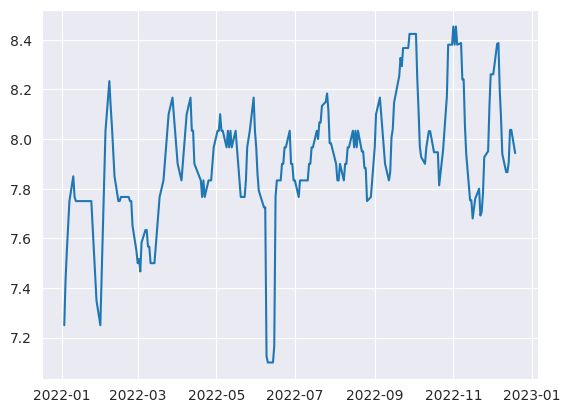

In [6]:
plot_mean_student_price(orni_df)

In [7]:
alpine_df = get_mean_resto_by_day(flep_df, "Alpine")

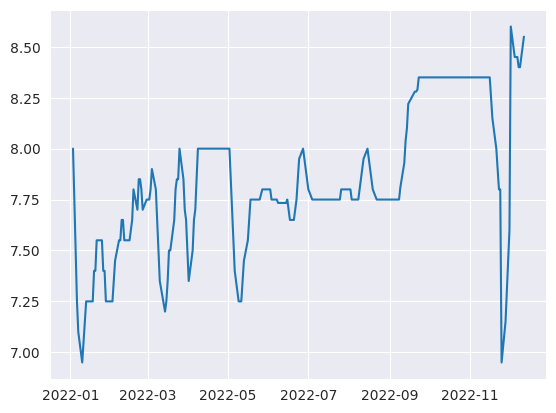

In [8]:
plot_mean_student_price(alpine_df)

In [9]:
native_df = get_mean_resto_by_day(flep_df, "Native")

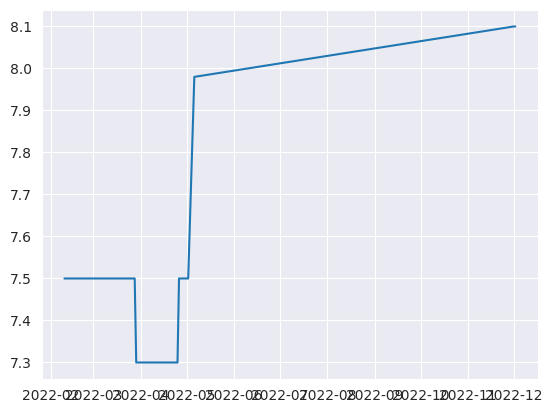

In [10]:
plot_mean_student_price(native_df)

In [11]:
native_df

,date,Prix etudiant,Prix doctorant,Prix campus
0,2022-02-10,7.5,8.5,9.0
1,2022-02-22,7.5,8.5,9.0
2,2022-02-24,7.5,8.5,11.5
3,2022-02-28,7.5,8.5,9.0
4,2022-03-07,7.5,8.5,9.0
5,2022-03-08,7.5,8.5,9.0
6,2022-03-09,7.5,8.5,9.0
7,2022-03-10,7.5,8.5,9.0
8,2022-03-11,7.5,8.5,9.0
9,2022-03-28,7.5,8.5,9.0


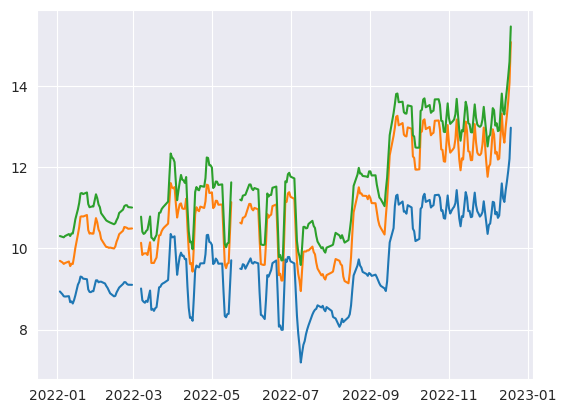

In [12]:
restos_all_menus_df = get_mean_all_restos_by_day(flep_df, filter_student_menus=False)
plot_mean_all_prices(restos_all_menus_df)

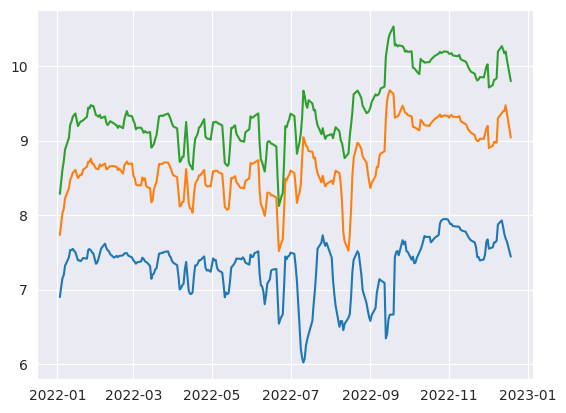

In [13]:
restos_student_prices_df = get_mean_all_restos_by_day(flep_df, filter_student_menus=True, threshold_student_menu=9.)
plot_mean_all_prices(restos_student_prices_df)

In [14]:
temp = restos_student_prices_df[
    restos_student_prices_df["date"] >= pd.to_datetime("2022.09.25")
    ]
flep_student_mean = temp["Prix etudiant"].mean()
flep_doctoral_mean = temp["Prix doctorant"].mean()
flep_internal_mean = temp["Prix campus"].mean()

In [16]:
rate_student_doctoral = taux_var(flep_doctoral_mean, flep_student_mean)
rate_student_doctoral

20.301634802670755

In [17]:
rate_student_campus = taux_var(flep_internal_mean, flep_student_mean)
rate_student_campus

31.10212425079461